# SANS2D data reduction

In [2]:
#Adding path to perform local testing
import sys
sys.path.append('/Users/wojciechpotrzebowski/SCIPP_SPACE/ess/src')

In [3]:
import scipp as sc
import scippneutron as scn
from ess.loki.load_sans2d import load_isis, load_rkh_q, load_rkh_wav#, load_and_apply_masks, apply_tof_mask
from ess.loki.sans2d.transform_coordinates import setup_offsets, setup_geometry
from ess import sans
from scippneutron.tof.conversions import beamline, elastic_Q

## Loading data files

In [6]:
path = 'data'
detector_efficiency_file = 'DIRECT_SANS2D_REAR_34327_4m_8mm_16Feb16.dat' #Efficency correction for main detector

sample_run_number = 63114
# sample_transmission_run_number = 63114
background_run_number = 63159
# background_transmission_run_number = 63159 
direct_run_number = 63091

In [7]:
detector_efficiency = load_rkh_wav(filename=f'{path}/{detector_efficiency_file}')

LoadRKH-[Notice] LoadRKH started
LoadRKH-[Notice] LoadRKH successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds


In [8]:
ds = sc.Dataset()
#Using only one-forth of the full spectra 245760 (reserved for first detector)
spectrum_size =  245760//4
tof_bins = sc.linspace(dim='tof', start=0, stop=100000, num=2, unit='us')

ds['sample'] =  load_isis(filename=f'{path}/SANS2D000{sample_run_number}.nxs', spectrum_size = spectrum_size, tof_bins = tof_bins)
# Background is a measurement with the solvent which the sample is placed in
ds['background'] = load_isis(filename=f'{path}/SANS2D000{background_run_number}.nxs', spectrum_size = spectrum_size, tof_bins = tof_bins)
# With the empty sample holder/cuvette
ds['direct'] = load_isis(filename=f'{path}/SANS2D000{direct_run_number}.nxs', spectrum_size = spectrum_size, tof_bins = tof_bins)
# ds['sample_trans'] = load_isis(filename=f'{path}/SANS2D000{sample_transmission_run_number}.nxs', spectrum_size = spectrum_size, tof_bins = tof_bins)
# ds['background_trans'] = load_isis(filename=f'{path}/SANS2D000{background_transmission_run_number}.nxs', spectrum_size =  spectrum_size, tof_bins = tof_bins)

Load-[Notice] Load started
Load-[Notice] Load successful, Duration 4.32 seconds


Workspace run log 'good_frames' has unrecognised units: 'frames'
Workspace run log 'period_change_log' has unrecognised units: 'period_number'
Workspace run log 'raw_frames' has unrecognised units: 'frames'
Workspace run log 'veto_log' has unrecognised units: 'is_vetoing'
Workspace run log 'events_log' has unrecognised units: 'events'
Workspace run log 'frame_log' has unrecognised units: 'frame_number'
Workspace run log 'good_frame_log' has unrecognised units: 'is_good'
Workspace run log 'period_log' has unrecognised units: 'period_number'
Workspace run log 'raw_events_log' has unrecognised units: 'events'


ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] 

Workspace run log 'good_frames' has unrecognised units: 'frames'
Workspace run log 'period_change_log' has unrecognised units: 'period_number'
Workspace run log 'raw_frames' has unrecognised units: 'frames'
Workspace run log 'veto_log' has unrecognised units: 'is_vetoing'
Workspace run log 'events_log' has unrecognised units: 'events'
Workspace run log 'frame_log' has unrecognised units: 'frame_number'
Workspace run log 'good_frame_log' has unrecognised units: 'is_good'
Workspace run log 'period_log' has unrecognised units: 'period_number'
Workspace run log 'raw_events_log' has unrecognised units: 'events'


ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] 

Workspace run log 'good_frames' has unrecognised units: 'frames'
Workspace run log 'period_change_log' has unrecognised units: 'period_number'
Workspace run log 'raw_frames' has unrecognised units: 'frames'
Workspace run log 'veto_log' has unrecognised units: 'is_vetoing'
Workspace run log 'events_log' has unrecognised units: 'events'
Workspace run log 'frame_log' has unrecognised units: 'frame_number'
Workspace run log 'good_frame_log' has unrecognised units: 'is_good'
Workspace run log 'period_log' has unrecognised units: 'period_number'
Workspace run log 'raw_events_log' has unrecognised units: 'events'


ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] ExtractSpectra started
ExtractSpectra-[Notice] ExtractSpectra successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
ExtractSpectra-[Notice] 

In [9]:
ds

<IPython.core.display.Javascript object>

<scipp.Dataset>
Dimensions: Sizes[spectrum:61440, tof:1, ]
Coordinates:
  position                vector_3_float64              [m]  (spectrum)  [(-0.519200, -0.481950, 23.281000), (-0.517162, -0.481950, 23.281000), ..., (0.517162, 0.481950, 23.281000), (0.519200, 0.481950, 23.281000)]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  spectrum                    int32  [dimensionless]  (spectrum)  [9, 10, ..., 61447, 61448]
  tof                       float64            [µs]  (tof [bin-edge])  [0.000000, 100000.000000]
Data:
  background              DataArrayView  [dimensionless]  (spectrum, tof)  [<scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

, ..., <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

]
    Attributes:
        Changer                 DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:2, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000]
Data:
                             string  [dimensionless]  (time)  ["ET", "FT"]

]
        Det_Temp_FLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:4, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T05:55:38.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.100000, 17.000000, 16.900000, 16.900000]

]
        Det_Temp_FLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
        Det_Temp_FRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
        Det_Temp_FRT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
        Det_Temp_RLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 

## Apply offsets to pixel positions

In [10]:
# Solid angle values
pixel_size = 0.0035 * sc.units.m
pixel_length = 0.002033984375 * sc.units.m

# Coordinate trasnformation
sample_pos_z_offset = 0.053 * sc.units.m
bench_pos_y_offset = 0.001 * sc.units.m
# There is some uncertainity here
monitor4_pos_z_offset = -6.719 * sc.units.m

# Geometry transformation
x_offset = -0.09288 * sc.units.m
y_offset = 0.08195 * sc.units.m
# z_offset = 0.0 * sc.units.m

In [11]:
# Change sample position
ds.coords["sample_position"].fields.z += sample_pos_z_offset
# Apply bench offset to pixel positions
ds.coords["position"].fields.y += bench_pos_y_offset

for key in ds:
    ds[key].attrs["monitor4"].value.coords["position"].fields.z += monitor4_pos_z_offset

# Now shift pixels positions to get the correct beam center
ds.coords['position'].fields.x += x_offset
ds.coords['position'].fields.y += y_offset
# ds.coords['position'].fields.z += z_offset

In [12]:
# scn.instrument_view(ds['sample'], pixel_size=0.0075)

## Mask bad pixels

In [13]:
mask_edges = (
    (sc.abs(ds.coords['position'].fields.x - x_offset) > sc.scalar(0.48, unit='m')) |
    (sc.abs(ds.coords['position'].fields.y - y_offset) > sc.scalar(0.45, unit='m')))

mask_center = sc.sqrt(
    ds.coords['position'].fields.x**2 +
    ds.coords['position'].fields.y**2) < sc.scalar(0.04, unit='m')
# cylindrical_radius = sc.sqrt(
#     ds.coords['position'].fields.x**2 +
#     ds.coords['position'].fields.y**2)
# mask_center = (cylindrical_radius < sc.scalar(0.04, unit='m')) | (cylindrical_radius > sc.scalar(0.4, unit='m'))

for key in ds:
    ds[key].masks['edges'] = mask_edges
    ds[key].masks['center'] = mask_center

In [14]:
scn.instrument_view(ds['sample'], pixel_size=0.0075)

## Convert data to wavelength

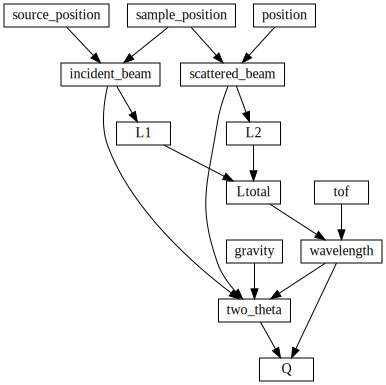

In [15]:
graph = sans.conversions.sans_elastic()
sc.show_graph(graph, simplified=True)

In [16]:
from scipp.constants import g
ds.coords["gravity"] = sc.vector(value=[0, -1, 0]) * g
ds_wav = ds.transform_coords("wavelength", graph=graph)
ds_wav

<scipp.Dataset>
Dimensions: Sizes[spectrum:61440, wavelength:1, ]
Coordinates:
  gravity                 vector_3_float64          [m/s^2]  ()  [(0.000000, -9.806650, 0.000000)]
  spectrum                    int32  [dimensionless]  (spectrum)  [9, 10, ..., 61447, 61448]
  wavelength                float64             [Å]  (spectrum, wavelength [bin-edge])  [0.000000, 16.943740, ..., 0.000000, 16.946723]
Data:
  background              DataArrayView  [dimensionless]  (spectrum, wavelength)  [<scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, ..., <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

]
    Masks:
        center                       bool  [dimensionless]  (spectrum)  [False, False, ..., False, False]
        edges                        bool  [dimensionless]  (spectrum)  [True, True, ..., True, True]
    Attributes:
        Changer                 DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:2, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000]
Data:
                             string  [dimensionless]  (time)  ["ET", "FT"]

]
        Det_Temp_FLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:4, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T05:55:38.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.100000, 17.000000, 16.900000, 16.900000]

]
        Det_Temp_FLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
        Det_Temp_FRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
        Det_Temp_FRT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless

In [17]:
graph_monitor = {**beamline(scatter=False), **elastic_Q("tof")}
for key in ds:
    for m in ['monitor2', 'monitor4']:
        ds_wav[key].attrs[m].value = ds[key].attrs[m].value.transform_coords("wavelength", graph=graph_monitor)
ds_wav

<scipp.Dataset>
Dimensions: Sizes[spectrum:61440, wavelength:1, ]
Coordinates:
  gravity                 vector_3_float64          [m/s^2]  ()  [(0.000000, -9.806650, 0.000000)]
  spectrum                    int32  [dimensionless]  (spectrum)  [9, 10, ..., 61447, 61448]
  wavelength                float64             [Å]  (spectrum, wavelength [bin-edge])  [0.000000, 16.943740, ..., 0.000000, 16.946723]
Data:
  background              DataArrayView  [dimensionless]  (spectrum, wavelength)  [<scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, ..., <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

]
    Masks:
        center                       bool  [dimensionless]  (spectrum)  [False, False, ..., False, False]
        edges                        bool  [dimensionless]  (spectrum)  [True, True, ..., True, True]
    Attributes:
        Changer                 DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:2, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000]
Data:
                             string  [dimensionless]  (time)  ["ET", "FT"]

]
        Det_Temp_FLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:4, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T05:55:38.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.100000, 17.000000, 16.900000, 16.900000]

]
        Det_Temp_FLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
        Det_Temp_FRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
        Det_Temp_FRT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless

## Compute normalization term

### Detector efficiency

In [18]:
from ess.wfm.tools import to_bin_edges
efficiency_cropped = detector_efficiency.copy(deep=False)
efficiency_cropped.coords['wavelength'] = to_bin_edges(detector_efficiency.coords['wavelength'], 'wavelength')
wavelength_min = sc.scalar(2.0, unit='angstrom')
wavelength_max = sc.scalar(16.0, unit='angstrom')
efficiency_cropped = efficiency_cropped['wavelength', wavelength_min:wavelength_max].copy(deep=True)

In [19]:
sc.plot(efficiency_cropped)

### Transmission fraction

In [20]:
from ess.sans import normalization as sansnorm
wavelength_bins = efficiency_cropped.coords['wavelength']
threshold = 30.0 * sc.units.counts
transmission_fraction = sansnorm.transmission_fraction(
    sample=ds['sample'],
    direct=ds['direct'],
    wavelength_bins=wavelength_bins,
    threshold=threshold)

In [21]:
transmission_fraction

<scipp.DataArray>
Dimensions: Sizes[wavelength:140, ]
Coordinates:
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 2.100000, ..., 15.900000, 16.000000]
Data:
                            float64  [dimensionless]  (wavelength)  [0.763917, 0.766272, ..., 0.521693, 0.541493]  [0.000009, 0.000007, ..., 0.000181, 0.000199]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]

In [22]:
transmission_fraction.plot()

In [23]:
monitor = sansnorm.substract_background_and_rebin(
    ds['sample'].attrs['monitor2'].value, wavelength_bins, threshold).copy(deep=True)
monitor.plot()

In [24]:
monitor

<scipp.DataArray>
Dimensions: Sizes[wavelength:140, ]
Coordinates:
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 2.100000, ..., 15.900000, 16.000000]
Data:
                            float64         [counts]  (wavelength)  [220732.640958, 277063.531560, ..., 5329.660266, 5221.953666]  [220737.814061, 277068.470531, ..., 5333.471044, 5225.764443]
Attributes:
  Ltotal                    float64              [m]  ()  [17.937000]
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  position                vector_3_float64              [m]  ()  [(0.000000, 0.000000, 17.937000)]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  spectrum                    int32  [dimensionless]  ()  [2]

In [25]:
monitor * transmission_fraction

<scipp.DataArray>
Dimensions: Sizes[wavelength:140, ]
Coordinates:
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 2.100000, ..., 15.900000, 16.000000]
Data:
                            float64         [counts]  (wavelength)  [168621.390622, 212306.132267, ..., 2780.447381, 2827.650024]  [557456.357646, 711966.179991, ..., 6596.131193, 6958.660304]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]

In [26]:
efficiency_cropped

<scipp.DataArray>
Dimensions: Sizes[wavelength:140, ]
Coordinates:
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 2.100000, ..., 15.900000, 16.000000]
Data:
                            float64  [dimensionless]  (wavelength)  [0.327785, 0.278660, ..., 0.064383, 0.063932]  [0.000061, 0.000049, ..., 0.000018, 0.000018]
Attributes:
  instrument_name            string  [dimensionless]  ()  [""]
  sample                   PyObject  [dimensionless]  ()  [<mantid.api._api.Sample object at 0x7fbb580402e0>]
  spectrum                    int32  [dimensionless]  ()  [1]

In [27]:
norm = (monitor * transmission_fraction) * efficiency_cropped.data
norm.plot()

In [28]:
norm

<scipp.DataArray>
Dimensions: Sizes[wavelength:140, ]
Coordinates:
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 2.100000, ..., 15.900000, 16.000000]
Data:
                            float64         [counts]  (wavelength)  [55271.613112, 59161.269279, ..., 179.014072, 180.778368]  [1798440.909103, 2268466.988526, ..., 169.094908, 174.421767]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]

### Solid Angle

In [29]:
solid_angle = sansnorm.solid_angle(ds['sample'], pixel_size=pixel_size, pixel_length=pixel_length)
solid_angle

<scipp.Variable> (spectrum: 61440)    float64  [dimensionless]  [0.000000, 0.000000, ..., 0.000000, 0.000000]

### The denominator term

In [30]:
# denominator = norm * solid_angle
denominator = solid_angle * norm
denominator.coords['position'] = ds['sample'].coords['position']
denominator.coords['gravity'] = ds['sample'].coords['gravity']
# denominator = sc.transpose(denominator)
denominator

<scipp.DataArray>
Dimensions: Sizes[spectrum:61440, wavelength:140, ]
Coordinates:
  gravity                 vector_3_float64          [m/s^2]  ()  [(0.000000, -9.806650, 0.000000)]
  position                vector_3_float64              [m]  (spectrum)  [(-0.612080, -0.399000, 23.281000), (-0.610042, -0.399000, 23.281000), ..., (0.424282, 0.564900, 23.281000), (0.426320, 0.564900, 23.281000)]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 2.100000, ..., 15.900000, 16.000000]
Data:
                            float64         [counts]  (spectrum, wavelength)  [0.024420, 0.026139, ..., 0.000079, 0.000080]  [0.000000, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]

In [31]:
# sample_normalized = ds_wav['sample'].bins / sc.lookup(func=denominator, dim='wavelength')
# sample_normalized

## Convert to Q

In [32]:
ds_q = ds_wav.transform_coords("Q", graph=graph)
ds_q

<scipp.Dataset>
Dimensions: Sizes[spectrum:61440, wavelength:1, ]
Coordinates:
  Q                         float64           [1/Å]  (spectrum, wavelength [bin-edge])  [inf, 0.067856, ..., inf, 0.065586]
  spectrum                    int32  [dimensionless]  (spectrum)  [9, 10, ..., 61447, 61448]
Data:
  background              DataArrayView  [dimensionless]  (spectrum, wavelength)  [<scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

, ..., <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

]
    Masks:
        center                       bool  [dimensionless]  (spectrum)  [False, False, ..., False, False]
        edges                        bool  [dimensionless]  (spectrum)  [True, True, ..., True, True]
    Attributes:
        Changer                 DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:2, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000]
Data:
                             string  [dimensionless]  (time)  ["ET", "FT"]

]
        Det_Temp_FLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:4, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T05:55:38.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.100000, 17.000000, 16.900000, 16.900000]

]
        Det_Temp_FLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
        Det_Temp_FRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                        

In [33]:
q_edges = sc.array(dims=['Q'], values=[0.01, 0.6], unit='1/angstrom')
sample_q_binned = sc.bin(ds_q['sample'], edges=[q_edges])
sample_q_binned

<scipp.DataArray>
Dimensions: Sizes[spectrum:61440, wavelength:1, Q:1, ]
Coordinates:
  Q                         float64           [1/Å]  (Q [bin-edge])  [0.010000, 0.600000]
  spectrum                    int32  [dimensionless]  (spectrum)  [9, 10, ..., 61447, 61448]
Data:
                          DataArrayView  [dimensionless]  (spectrum, wavelength, Q)  [<scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

, ..., <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:1, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.230284]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:53:37.686950683]
Data:
                            float32         [counts]  (event)  [1.000000]  [1.000000]
Attributes:
  tof                       float64            [µs]  (event)  [28523.556641]
  two_theta                 float64            [rad]  (event)  [0.177395]
  wavelength                float64             [Å]  (event)  [4.833808]

]
Masks:
  center                       bool  [dimensionless]  (spectrum)  [False, False, ..., False, False]
  edges                        bool  [dimensionless]  (spectrum)  [True, True, ..., True, True]
Attributes:
  Changer                 DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:2, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000]
Data:
                             string  [dimensionless]  (time)  ["IT", "JT"]

]
  Det_Temp_FLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [16.799999, 16.799999, 16.799999]

]
  Det_Temp_FLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.400000, 17.400000, 17.400000]

]
  Det_Temp_FRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless] 

In [34]:
sample_q_summed = sample_q_binned.bins.concat('spectrum')

In [35]:
sc.plot(sample_q_summed["wavelength", 0], norm="log")

### Convert denominator to Q

In [36]:
denominator_q = denominator.transform_coords("Q", graph=graph)
denominator_q

<scipp.DataArray>
Dimensions: Sizes[spectrum:61440, wavelength:140, ]
Coordinates:
  Q                         float64           [1/Å]  (wavelength [bin-edge], spectrum)  [0.566828, 0.565536, ..., 0.068461, 0.068577]
Data:
                            float64         [counts]  (spectrum, wavelength)  [0.024420, 0.026139, ..., 0.000079, 0.000080]  [0.000000, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  gravity                 vector_3_float64          [m/s^2]  ()  [(0.000000, -9.806650, 0.000000)]
  incident_beam           vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  position                vector_3_float64              [m]  (spectrum)  [(-0.612080, -0.399000, 23.281000), (-0.610042, -0.399000, 23.281000), ..., (0.424282, 0.564900, 23.281000), (0.426320, 0.564900, 23.281000)]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  scattered_beam          vector_3_float64              [m]  (spectrum)  [(-0.612080, -0.399000, 4.000000), (-0.610042, -0.399000, 4.000000), ..., (0.424282, 0.564900, 4.000000), (0.426320, 0.564900, 4.000000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  two_theta                 float64            [rad]  (wavelength [bin-edge], spectrum)  [0.180672, 0.180260, ..., 0.174555, 0.174853]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 2.100000, ..., 15.900000, 16.000000]

In [37]:
den_q_summed = denominator_q.sum('spectrum')
den_q_summed.plot()

## Normalize the sample

In [38]:
sample_normalized = sample_q_summed.bins / sc.lookup(func=den_q_summed, dim='wavelength')
sample_normalized

<scipp.DataArray>
Dimensions: Sizes[wavelength:1, Q:1, ]
Coordinates:
  Q                         float64           [1/Å]  (Q [bin-edge])  [0.010000, 0.600000]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [0.000000, 16.992543]
Data:
                          DataArrayView  [dimensionless]  (wavelength, Q)  [<scipp.DataArray>
Dimensions: Sizes[event:6557869, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.405905, 0.094276, ..., 0.121448, 0.267435]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:38:54.888999938, 2020-02-12T20:41:00.788986206, ..., 2020-02-12T21:07:49.986083984, 2020-02-12T21:08:08.286010742]
Data:
                            float32  [dimensionless]  (event)  [0.000338, 0.031408, ..., 0.008403, 0.000592]  [0.000000, 0.000986, ..., 0.000071, 0.000000]
Attributes:
  tof                       float64            [µs]  (event)  [15535.527344, 66920.695312, ..., 49839.109375, 22640.916016]
  two_theta                 float64            [rad]  (event)  [0.170323, 0.170407, ..., 0.163503, 0.163561]
  wavelength                float64             [Å]  (event)  [2.633327, 11.343294, ..., 8.449551, 3.838463]

]
Attributes:
  Changer                 DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:2, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000]
Data:
                             string  [dimensionless]  (time)  ["IT", "JT"]

]
  Det_Temp_FLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [16.799999, 16.799999, 16.799999]

]
  Det_Temp_FLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.400000, 17.400000, 17.400000]

]
  Det_Temp_FRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.400000, 17.400000, 17.400000]

]
  Det_Temp_FRT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.400000, 17.400000, 17.400000]

]
  Det_Temp_RLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.799999, 17.799999, 17.799999]

]
  Det_Temp_RLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.400000, 17.400000, 17.400000]

]
  Det_Temp_RRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetim

In [39]:
sc.plot(sample_normalized['wavelength', 0], norm='log')

### Process the background run

In [40]:
transmission_fraction_background = sansnorm.transmission_fraction(
    sample=ds['background'],
    direct=ds['direct'],
    wavelength_bins=wavelength_bins,
    threshold=threshold)
transmission_fraction_background.plot()

In [41]:
monitor_background = sansnorm.substract_background_and_rebin(
    ds['background'].attrs['monitor2'].value, wavelength_bins, threshold).copy(deep=True)
norm_background = (monitor_background * transmission_fraction_background) * efficiency_cropped.data
denominator_background = solid_angle * norm_background
denominator_background.coords['position'] = ds.coords['position']
denominator_background.coords['gravity'] = ds.coords['gravity']
denominator_background

<scipp.DataArray>
Dimensions: Sizes[spectrum:61440, wavelength:140, ]
Coordinates:
  gravity                 vector_3_float64          [m/s^2]  ()  [(0.000000, -9.806650, 0.000000)]
  position                vector_3_float64              [m]  (spectrum)  [(-0.612080, -0.399000, 23.281000), (-0.610042, -0.399000, 23.281000), ..., (0.424282, 0.564900, 23.281000), (0.426320, 0.564900, 23.281000)]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 2.100000, ..., 15.900000, 16.000000]
Data:
                            float64         [counts]  (spectrum, wavelength)  [0.029842, 0.031998, ..., 0.000148, 0.000147]  [0.000001, 0.000001, ..., 0.000000, 0.000000]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]

In [42]:
q_edges = sc.array(dims=['Q'], values=[0.01, 0.6], unit='1/angstrom')
background_q_binned = sc.bin(ds_q['background'], edges=[q_edges])
background_q_binned

<scipp.DataArray>
Dimensions: Sizes[spectrum:61440, wavelength:1, Q:1, ]
Coordinates:
  Q                         float64           [1/Å]  (Q [bin-edge])  [0.010000, 0.600000]
  spectrum                    int32  [dimensionless]  (spectrum)  [9, 10, ..., 61447, 61448]
Data:
                          DataArrayView  [dimensionless]  (spectrum, wavelength, Q)  [<scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

, ..., <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  []
  pulse_time              datetime64             [ns]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []
  two_theta                 float64            [rad]  (event)  []
  wavelength                float64             [Å]  (event)  []

]
Masks:
  center                       bool  [dimensionless]  (spectrum)  [False, False, ..., False, False]
  edges                        bool  [dimensionless]  (spectrum)  [True, True, ..., True, True]
Attributes:
  Changer                 DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:2, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000]
Data:
                             string  [dimensionless]  (time)  ["ET", "FT"]

]
  Det_Temp_FLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:4, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T05:55:38.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.100000, 17.000000, 16.900000, 16.900000]

]
  Det_Temp_FLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
  Det_Temp_FRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.6000

In [43]:
background_q_summed = background_q_binned.bins.concat('spectrum')

In [44]:
denominator_background_q = denominator_background.transform_coords("Q", graph=graph)
denominator_background_q

<scipp.DataArray>
Dimensions: Sizes[spectrum:61440, wavelength:140, ]
Coordinates:
  Q                         float64           [1/Å]  (wavelength [bin-edge], spectrum)  [0.566828, 0.565536, ..., 0.068461, 0.068577]
Data:
                            float64         [counts]  (spectrum, wavelength)  [0.029842, 0.031998, ..., 0.000148, 0.000147]  [0.000001, 0.000001, ..., 0.000000, 0.000000]
Attributes:
  gravity                 vector_3_float64          [m/s^2]  ()  [(0.000000, -9.806650, 0.000000)]
  incident_beam           vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  position                vector_3_float64              [m]  (spectrum)  [(-0.612080, -0.399000, 23.281000), (-0.610042, -0.399000, 23.281000), ..., (0.424282, 0.564900, 23.281000), (0.426320, 0.564900, 23.281000)]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  scattered_beam          vector_3_float64              [m]  (spectrum)  [(-0.612080, -0.399000, 4.000000), (-0.610042, -0.399000, 4.000000), ..., (0.424282, 0.564900, 4.000000), (0.426320, 0.564900, 4.000000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  two_theta                 float64            [rad]  (wavelength [bin-edge], spectrum)  [0.180672, 0.180260, ..., 0.174555, 0.174853]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 2.100000, ..., 15.900000, 16.000000]

In [45]:
den_back_q_summed = denominator_background_q.sum('spectrum')
den_back_q_summed.plot()

In [46]:
background_normalized = background_q_summed.bins / sc.lookup(func=den_back_q_summed, dim='wavelength')
background_normalized

<scipp.DataArray>
Dimensions: Sizes[wavelength:1, Q:1, ]
Coordinates:
  Q                         float64           [1/Å]  (Q [bin-edge])  [0.010000, 0.600000]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [0.000000, 16.992543]
Data:
                          DataArrayView  [dimensionless]  (wavelength, Q)  [<scipp.DataArray>
Dimensions: Sizes[event:123453, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.205781, 0.337300, ..., 0.209768, 0.230178]
  pulse_time              datetime64             [ns]  (event)  [2020-02-14T05:39:36.239990234, 2020-02-14T05:42:50.338989257, ..., 2020-02-14T06:07:05.536010742, 2020-02-14T05:52:28.537963867]
Data:
                            float32  [dimensionless]  (event)  [0.000842, 0.000303, ..., 0.000687, 0.000580]  [0.000001, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  tof                       float64            [µs]  (event)  [30570.376953, 18649.187500, ..., 28810.802734, 26304.730469]
  two_theta                 float64            [rad]  (event)  [0.169915, 0.169904, ..., 0.163254, 0.163556]
  wavelength                float64             [Å]  (event)  [5.181851, 3.161142, ..., 4.884526, 4.459614]

]
Attributes:
  Changer                 DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:2, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000]
Data:
                             string  [dimensionless]  (time)  ["ET", "FT"]

]
  Det_Temp_FLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:4, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T05:55:38.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.100000, 17.000000, 16.900000, 16.900000]

]
  Det_Temp_FLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
  Det_Temp_FRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
  Det_Temp_FRT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
  Det_Temp_RLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [18.000000, 18.000000, 18.000000]

]
  Det_Temp_RLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-14T05:33:15.000000000, 2020-02-14T05:33:34.000000000, 2020-02-14T06:08:42.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.600000, 17.600000, 17.600000]

]
  Det_Temp_RRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordi

In [47]:
sc.plot(background_normalized['wavelength', 0], norm='log')

## Subtract background

In [48]:
q_edges = sc.linspace(dim='Q', start=0.01, stop=0.6, num=201, unit='1/angstrom')
reduced = sc.bin(sample_normalized['wavelength', 0], edges=[q_edges]).bins.sum() - sc.bin(
    background_normalized['wavelength', 0], edges=[q_edges]).bins.sum()

In [49]:
reduced

<scipp.DataArray>
Dimensions: Sizes[Q:200, ]
Coordinates:
  Q                         float64           [1/Å]  (Q [bin-edge])  [0.010000, 0.012950, ..., 0.597050, 0.600000]
Data:
                            float32  [dimensionless]  (Q)  [195.705734, 258.317841, ..., 0.001304, 0.000000]  [15.941565, 20.812410, ..., 0.000001, 0.000000]
Attributes:
  L1                        float64              [m]  ()  [19.334000]
  current_period              int64  [dimensionless]  ()  [1]
  experiment_identifier      string  [dimensionless]  ()  ["1920676"]
  gravity                 vector_3_float64          [m/s^2]  ()  [(0.000000, -9.806650, 0.000000)]
  incident_beam           vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.334000)]
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  measurement_id             string  [dimensionless]  ()  [""]
  measurement_label          string  [dimensionless]  ()  [""]
  measurement_subid          string  [dimensionless]  ()  [""]
  measurement_type           string  [dimensionless]  ()  [""]
  nperiods                    int64  [dimensionless]  ()  [1]
  placeholder monitor_5   DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[tof:481, ]
Coordinates:
  position                vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  tof                       float64            [µs]  (tof [bin-edge])  [5.500000, 50.000000, ..., 99750.000000, 100005.000000]
Data:
                            float64         [counts]  (tof)  [0.000000, 0.000000, ..., 0.000000, 0.000000]  [0.000000, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  spectrum                    int32  [dimensionless]  ()  [5]

]
  placeholder monitor_6   DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[tof:481, ]
Coordinates:
  position                vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  tof                       float64            [µs]  (tof [bin-edge])  [5.500000, 50.000000, ..., 99750.000000, 100005.000000]
Data:
                            float64         [counts]  (tof)  [0.000000, 0.000000, ..., 0.000000, 0.000000]  [0.000000, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  spectrum                    int32  [dimensionless]  ()  [6]

]
  placeholder monitor_7   DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[tof:481, ]
Coordinates:
  position                vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  tof                       float64            [µs]  (tof [bin-edge])  [5.500000, 50.000000, ..., 99750.000000, 100005.000000]
Data:
                            float64         [counts]  (tof)  [0.000000, 0.000000, ..., 0.000000, 0.000000]  [0.000000, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  spectrum                    int32  [dimensionless]  ()  [7]

]
  placeholder monitor_8   DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[tof:481, ]
Coordinates:
  position                vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  tof       

In [50]:
reduced.plot()

In [51]:
reduced.plot(norm='log')

## Wavelength slices

In [52]:
wav_edges = sc.linspace(dim='wavelength', start=2.0, stop=16.0, num=11, unit='angstrom')

In [53]:
sample_q_summed

<scipp.DataArray>
Dimensions: Sizes[wavelength:1, Q:1, ]
Coordinates:
  Q                         float64           [1/Å]  (Q [bin-edge])  [0.010000, 0.600000]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [0.000000, 16.992543]
Data:
                          DataArrayView  [dimensionless]  (wavelength, Q)  [<scipp.DataArray>
Dimensions: Sizes[event:6557869, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.405905, 0.094276, ..., 0.121448, 0.267435]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:38:54.888999938, 2020-02-12T20:41:00.788986206, ..., 2020-02-12T21:07:49.986083984, 2020-02-12T21:08:08.286010742]
Data:
                            float32         [counts]  (event)  [1.000000, 1.000000, ..., 1.000000, 1.000000]  [1.000000, 1.000000, ..., 1.000000, 1.000000]
Attributes:
  tof                       float64            [µs]  (event)  [15535.527344, 66920.695312, ..., 49839.109375, 22640.916016]
  two_theta                 float64            [rad]  (event)  [0.170323, 0.170407, ..., 0.163503, 0.163561]
  wavelength                float64             [Å]  (event)  [2.633327, 11.343294, ..., 8.449551, 3.838463]

]
Attributes:
  Changer                 DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:2, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000]
Data:
                             string  [dimensionless]  (time)  ["IT", "JT"]

]
  Det_Temp_FLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [16.799999, 16.799999, 16.799999]

]
  Det_Temp_FLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.400000, 17.400000, 17.400000]

]
  Det_Temp_FRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.400000, 17.400000, 17.400000]

]
  Det_Temp_FRT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.400000, 17.400000, 17.400000]

]
  Det_Temp_RLB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.799999, 17.799999, 17.799999]

]
  Det_Temp_RLT            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetime64             [ns]  (time)  [2020-02-12T20:37:41.000000000, 2020-02-12T20:38:00.000000000, 2020-02-12T21:08:13.000000000]
Data:
                            float64  [dimensionless]  (time)  [17.400000, 17.400000, 17.400000]

]
  Det_Temp_RRB            DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[time:3, ]
Coordinates:
  time                    datetim

In [54]:
sample_q_summed.bins.coords['wavelength'] = sample_q_summed.bins.attrs.pop('wavelength')

In [55]:
sample_slices = sc.bin(sample_q_summed, edges=[wav_edges])

In [56]:
sample_slices

<scipp.DataArray>
Dimensions: Sizes[wavelength:10, Q:1, ]
Coordinates:
  Q                         float64           [1/Å]  (Q [bin-edge])  [0.010000, 0.600000]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 3.400000, ..., 14.600000, 16.000000]
Data:
                          DataArrayView  [dimensionless]  (wavelength, Q)  [<scipp.DataArray>
Dimensions: Sizes[event:1541444, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.405905, 0.376507, ..., 0.399529, 0.353907]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:38:54.888999938, 2020-02-12T20:46:04.287994384, ..., 2020-02-12T21:01:18.685913085, 2020-02-12T21:04:53.385986328]
  wavelength                float64             [Å]  (event)  [2.633327, 2.838955, ..., 2.569503, 2.900704]
Data:
                            float32         [counts]  (event)  [1.000000, 1.000000, ..., 1.000000, 1.000000]  [1.000000, 1.000000, ..., 1.000000, 1.000000]
Attributes:
  tof                       float64            [µs]  (event)  [15535.527344, 16748.646484, ..., 15156.040039, 17109.609375]
  two_theta                 float64            [rad]  (event)  [0.170323, 0.170324, ..., 0.163569, 0.163568]

, <scipp.DataArray>
Dimensions: Sizes[event:1761654, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.234393, 0.229533, ..., 0.290569, 0.267435]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:41:14.788986206, 2020-02-12T20:42:18.088012695, ..., 2020-02-12T20:46:28.488006591, 2020-02-12T21:08:08.286010742]
  wavelength                float64             [Å]  (event)  [4.560465, 4.657038, ..., 3.532915, 3.838463]
Data:
                            float32         [counts]  (event)  [1.000000, 1.000000, ..., 1.000000, 1.000000]  [1.000000, 1.000000, ..., 1.000000, 1.000000]
Attributes:
  tof                       float64            [µs]  (event)  [26904.835938, 27474.582031, ..., 20838.664062, 22640.916016]
  two_theta                 float64            [rad]  (event)  [0.170333, 0.170334, ..., 0.163563, 0.163561]

, ..., <scipp.DataArray>
Dimensions: Sizes[event:36517, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.077946, 0.073312, ..., 0.073270, 0.072476]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:43:24.287994384, 2020-02-12T20:58:11.986938476, ..., 2020-02-12T20:39:09.289001464, 2020-02-12T20:42:54.088012695]
  wavelength                float64             [Å]  (event)  [13.553855, 14.412011, ..., 13.994638, 14.147507]
Data:
                            float32         [counts]  (event)  [1.000000, 1.000000, ..., 1.000000, 1.000000]  [1.000000, 1.000000, ..., 1.000000, 1.000000]
Attributes:
  tof                       float64            [µs]  (event)  [79957.148438, 85019.593750, ..., 82546.429688, 83448.117188]
  two_theta                 float64            [rad]  (event)  [0.168341, 0.168358, ..., 0.163376, 0.163372]

, <scipp.DataArray>
Dimensions: Sizes[event:19803, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.067299, 0.067965, ..., 0.064525, 0.069824]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:59:37.486938476, 2020-02-12T21:00:11.885986328, ..., 2020-02-12T20:42:21.588012695, 2020-02-12T21:03:55.586059570]
  wavelength                float64             [Å]  (event)  [15.898346, 15.470656, ..., 15.799363, 14.603727]
Data:
                            float32         [counts]  (event)  [1.000000, 1.000000, ..., 1.000000, 1.000000]  [1.000000, 1.000000, ..., 1.000000, 1.000000]
Attributes:
  tof                       float64            [µs]  (event)  [93793.601562, 91262.546875, ..., 93189.140625, 86136.937500]
  two_theta                 float64            [rad]  (event)  [0.170493, 0.167541, ..., 0.162430, 0.162467]

]
Attributes:
  Changer                 DataArray  [dimensionless]  ()  [<scipp.

In [57]:
sc.plot(sc.collapse(sample_slices, keep='Q'), norm='log')

### Normalize

In [58]:
sample_slices_normalized = sample_slices.bins / sc.lookup(func=den_q_summed, dim='wavelength')
sample_slices_normalized

<scipp.DataArray>
Dimensions: Sizes[wavelength:10, Q:1, ]
Coordinates:
  Q                         float64           [1/Å]  (Q [bin-edge])  [0.010000, 0.600000]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 3.400000, ..., 14.600000, 16.000000]
Data:
                          DataArrayView  [dimensionless]  (wavelength, Q)  [<scipp.DataArray>
Dimensions: Sizes[event:1541444, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.405905, 0.376507, ..., 0.399529, 0.353907]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:38:54.888999938, 2020-02-12T20:46:04.287994384, ..., 2020-02-12T21:01:18.685913085, 2020-02-12T21:04:53.385986328]
  wavelength                float64             [Å]  (event)  [2.633327, 2.838955, ..., 2.569503, 2.900704]
Data:
                            float32  [dimensionless]  (event)  [0.000338, 0.000345, ..., 0.000364, 0.000365]  [0.000000, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  tof                       float64            [µs]  (event)  [15535.527344, 16748.646484, ..., 15156.040039, 17109.609375]
  two_theta                 float64            [rad]  (event)  [0.170323, 0.170324, ..., 0.163569, 0.163568]

, <scipp.DataArray>
Dimensions: Sizes[event:1761654, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.234393, 0.229533, ..., 0.290569, 0.267435]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:41:14.788986206, 2020-02-12T20:42:18.088012695, ..., 2020-02-12T20:46:28.488006591, 2020-02-12T21:08:08.286010742]
  wavelength                float64             [Å]  (event)  [4.560465, 4.657038, ..., 3.532915, 3.838463]
Data:
                            float32  [dimensionless]  (event)  [0.000827, 0.000868, ..., 0.000505, 0.000592]  [0.000001, 0.000001, ..., 0.000000, 0.000000]
Attributes:
  tof                       float64            [µs]  (event)  [26904.835938, 27474.582031, ..., 20838.664062, 22640.916016]
  two_theta                 float64            [rad]  (event)  [0.170333, 0.170334, ..., 0.163563, 0.163561]

, ..., <scipp.DataArray>
Dimensions: Sizes[event:36517, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.077946, 0.073312, ..., 0.073270, 0.072476]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:43:24.287994384, 2020-02-12T20:58:11.986938476, ..., 2020-02-12T20:39:09.289001464, 2020-02-12T20:42:54.088012695]
  wavelength                float64             [Å]  (event)  [13.553855, 14.412011, ..., 13.994638, 14.147507]
Data:
                            float32  [dimensionless]  (event)  [0.079868, 0.117539, ..., 0.096374, 0.103958]  [0.006379, 0.013815, ..., 0.009288, 0.010807]
Attributes:
  tof                       float64            [µs]  (event)  [79957.148438, 85019.593750, ..., 82546.429688, 83448.117188]
  two_theta                 float64            [rad]  (event)  [0.168341, 0.168358, ..., 0.163376, 0.163372]

, <scipp.DataArray>
Dimensions: Sizes[event:19803, ]
Coordinates:
  Q                         float64           [1/Å]  (event)  [0.067299, 0.067965, ..., 0.064525, 0.069824]
  pulse_time              datetime64             [ns]  (event)  [2020-02-12T20:59:37.486938476, 2020-02-12T21:00:11.885986328, ..., 2020-02-12T20:42:21.588012695, 2020-02-12T21:03:55.586059570]
  wavelength                float64             [Å]  (event)  [15.898346, 15.470656, ..., 15.799363, 14.603727]
Data:
                            float32  [dimensionless]  (event)  [0.201315, 0.172955, ..., 0.191766, 0.127587]  [0.040528, 0.029914, ..., 0.036774, 0.016278]
Attributes:
  tof                       float64            [µs]  (event)  [93793.601562, 91262.546875, ..., 93189.140625, 86136.937500]
  two_theta                 float64            [rad]  (event)  [0.170493, 0.167541, ..., 0.162430, 0.162467]

]
Attributes:
  Changer                 DataArray  [dimensionless]  ()  [<scipp.

In [59]:
sc.plot(sc.collapse(sample_slices_normalized, keep='Q'), norm='log')

### Subtract background

In [60]:
background_q_summed.bins.coords['wavelength'] = background_q_summed.bins.attrs.pop('wavelength')
background_slices = sc.bin(background_q_summed, edges=[wav_edges])
background_slices_normalized = background_slices.bins / sc.lookup(func=den_back_q_summed, dim='wavelength')

In [61]:
q_bins = sc.linspace(dim='Q', start=0.01, stop=0.6, num=201, unit='1/angstrom')
reduced_slices = sc.histogram(sample_slices_normalized, bins=q_bins) - sc.histogram(
    background_slices_normalized, bins=q_bins)
reduced_slices

<scipp.DataArray>
Dimensions: Sizes[wavelength:10, Q:200, ]
Coordinates:
  Q                         float64           [1/Å]  (Q [bin-edge])  [0.010000, 0.012950, ..., 0.597050, 0.600000]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [2.000000, 3.400000, ..., 14.600000, 16.000000]
Data:
                            float32  [dimensionless]  (wavelength, Q)  [0.000000, 0.000000, ..., 0.000000, 0.000000]  [0.000000, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  L1                        float64              [m]  ()  [19.334000]
  current_period              int64  [dimensionless]  ()  [1]
  experiment_identifier      string  [dimensionless]  ()  ["1920676"]
  gravity                 vector_3_float64          [m/s^2]  ()  [(0.000000, -9.806650, 0.000000)]
  incident_beam           vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.334000)]
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  measurement_id             string  [dimensionless]  ()  [""]
  measurement_label          string  [dimensionless]  ()  [""]
  measurement_subid          string  [dimensionless]  ()  [""]
  measurement_type           string  [dimensionless]  ()  [""]
  nperiods                    int64  [dimensionless]  ()  [1]
  placeholder monitor_5   DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[tof:481, ]
Coordinates:
  position                vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  tof                       float64            [µs]  (tof [bin-edge])  [5.500000, 50.000000, ..., 99750.000000, 100005.000000]
Data:
                            float64         [counts]  (tof)  [0.000000, 0.000000, ..., 0.000000, 0.000000]  [0.000000, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  spectrum                    int32  [dimensionless]  ()  [5]

]
  placeholder monitor_6   DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[tof:481, ]
Coordinates:
  position                vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  tof                       float64            [µs]  (tof [bin-edge])  [5.500000, 50.000000, ..., 99750.000000, 100005.000000]
Data:
                            float64         [counts]  (tof)  [0.000000, 0.000000, ..., 0.000000, 0.000000]  [0.000000, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  spectrum                    int32  [dimensionless]  ()  [6]

]
  placeholder monitor_7   DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[tof:481, ]
Coordinates:
  position                vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  source_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 0.000000)]
  tof                       float64            [µs]  (tof [bin-edge])  [5.500000, 50.000000, ..., 99750.000000, 100005.000000]
Data:
                            float64         [counts]  (tof)  [0.000000, 0.000000, ..., 0.000000, 0.000000]  [0.000000, 0.000000, ..., 0.000000, 0.000000]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["SANS2D"]
  sample_position         vector_3_float64              [m]  ()  [(0.000000, 0.000000, 19.281000)]
  spectrum                    int32  [dimensionless]  ()  [7]

]
  placeholder monitor_8   DataArray  [dimensionless]  ()  [<scipp.DataArray>
Dimensions: Sizes[tof:481, ]
Coordinates:
  position                vector_3_float64              [m]  

In [62]:
sc.plot(sc.collapse(reduced_slices, keep='Q'), norm='log')

In [63]:
sc.plot(sc.collapse(reduced_slices, keep='Q'))

In [64]:
p = sc.plot(sc.collapse(reduced_slices, keep='Q'), norm='log', scale={'Q': 'log'})
p.ax.set_xlim(0.01, 0.6)
p